<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 69.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 116.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 102.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 108.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=c148120f451e25488b660b8a7670bb7

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla (e.g., for the last 5 days)
tesla_data = tesla.history(period="5d")

# Show the stock data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012  338.589996   
2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004  338.230011   
2024-11-27 00:00:00-05:00  341.799988  342.549988  326.589996  332.890015   
2024-11-29 00:00:00-05:00  336.079987  345.450012  334.649994  345.160004   
2024-12-02 00:00:00-05:00  352.515015  360.000000  351.150085  357.372009   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-25 00:00:00-05:00  95890900        0.0           0.0  
2024-11-26 00:00:00-05:00  62295900        0.0           0.0  
2024-11-27 00:00:00-05:00  57896400        0.0           0.0  
2024-11-29 00:00:00-05:00  37167600        0.0           0.0  
2024-12-02 00:00:00-05:00  66984064        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla (max period)
tesla_data = tesla.history(period="max")

# Display the stock data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012  338.589996   
2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004  338.230011   
2024-11-27 00:00:00-05:00  341.799988  342.549988  326.589996  332.890015   
2024-11-29 00:00:00-05:00  336.079987  345.450012  334.649994  345.160004   
2024-12-02 00:00:00-05:00  352.515015  360.000000  351.150085  357.439911   

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla (max period)
tesla_data = tesla.history(period="max")

# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

# Display the first 500 characters of the HTML data (just to check)
print(html_data[:500])  # Only showing first 500 characters for readability


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

# Parse the HTML data using BeautifulSoup with the 'html.parser' or 'html5lib' parser
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib' if you prefer

# Display a portion of the parsed content
print(soup.prettify()[:500])  # Print first 500 characters of the prettified HTML

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [11]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing the Tesla revenue
table = soup.find('table', {'class': 'table'})  # Look for the table with the class 'table'

# Extract the table rows
rows = table.find_all('tr')

# Initialize lists to store the data
dates = []
revenues = []

# Iterate over the rows and extract Date and Revenue data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Check if the row contains enough columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean up revenue format
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame with the extracted data
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the DataFrame
print(tesla_revenue.head())

   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract historical stock data for GameStop (e.g., for the last 5 days)
gamestop_data = gamestop.history(period="5d")

# Display the stock data
print(gamestop_data)

                                Open       High        Low      Close  \
Date                                                                    
2024-11-25 00:00:00-05:00  28.049999  29.770000  27.959999  29.670000   
2024-11-26 00:00:00-05:00  29.400000  32.119999  28.780001  30.330000   
2024-11-27 00:00:00-05:00  30.799999  31.549999  30.510000  30.889999   
2024-11-29 00:00:00-05:00  31.010000  31.080000  28.850000  29.049999   
2024-12-02 00:00:00-05:00  28.959999  29.365000  26.749901  27.219999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-25 00:00:00-05:00  13090400        0.0           0.0  
2024-11-26 00:00:00-05:00  24657300        0.0           0.0  
2024-11-27 00:00:00-05:00  12895100        0.0           0.0  
2024-11-29 00:00:00-05:00  10473700        0.0           0.0  
2024-12-02 00:00:00-05:00  12379262        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract historical stock data for GameStop with the max period
gme_data = gamestop.history(period="max")

# Display the first few rows of the data
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract historical stock data for GameStop with the max period
gme_data = gamestop.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Optionally, print the first 500 characters of the HTML data to check the content
print(html_data_2[:500])  # Displaying the first 500 characters

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup with the 'html.parser' or 'html5lib' parser
soup = BeautifulSoup(html_data_2, 'html.parser')  # You can also use 'html5lib' if you prefer

# Display the prettified HTML content
print(soup.prettify()[:500])  # Print first 500 characters of the prettified HTML

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table containing the GameStop revenue
table = soup.find('table')

# Extract the table rows
rows = table.find_all('tr')

# Initialize lists to store the data
dates = []
revenues = []

# Iterate over the rows and extract Date and Revenue data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Check if the row contains enough columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean up revenue format
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame with the extracted data
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the DataFrame
print(gme_revenue.head())

   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
# Display the last 5 rows of the gme_revenue DataFrame
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [26]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


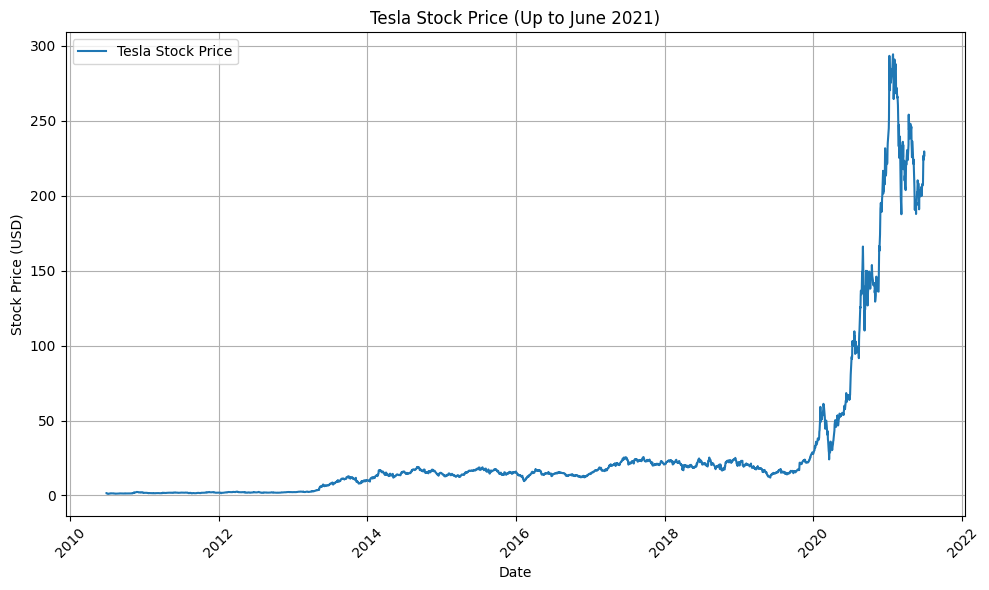

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Tesla stock data from Yahoo Finance (symbol: TSLA) up to June 2021
tesla_data = yf.download('TSLA', start='2010-01-01', end='2021-06-30')

# Plot the closing stock price
plt.figure(figsize=(10, 6))
plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price (Up to June 2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


[*********************100%***********************]  1 of 1 completed

Stock Data Head:
Price        Date Adj Close   Close    High     Low    Open     Volume
Ticker                  GME     GME     GME     GME     GME        GME
0      2010-01-04  3.854643  5.7250  5.7375  5.5000  5.5175   26702800
1      2010-01-05  3.959004  5.8800  5.9350  5.7250  5.7275   21269600
2      2010-01-06  4.044851  6.0075  6.0250  5.8050  5.8650   21471200
3      2010-01-07  3.443929  5.1150  5.2925  4.8550  5.0025  164761200
4      2010-01-08  3.415314  5.0725  5.3075  5.0575  5.1600   47872400

Revenue Data Head:
        Date     Revenue
0 2010-01-04  10000000.0
1 2010-01-05  10000000.0
2 2010-01-06  10000000.0
3 2010-01-07  10000000.0
4 2010-01-08  10000000.0

Filtered Stock Data Head:
Price        Date Adj Close   Close    High     Low    Open     Volume
Ticker                  GME     GME     GME     GME     GME        GME
0      2010-01-04  3.854643  5.7250  5.7375  5.5000  5.5175   26702800
1      2010-01-05  3.959004  5.8800  5.9350  5.7250  5.7275   21269600
2    

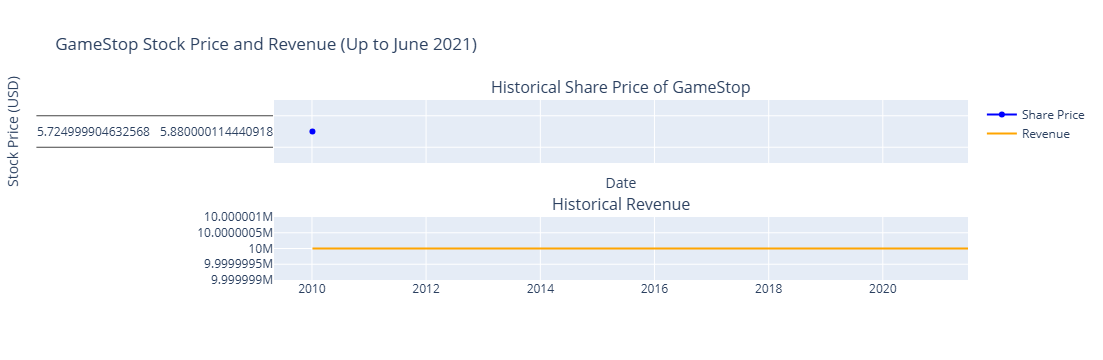

In [34]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fetch GameStop stock data (symbol: GME) up to June 2021
gme_data = yf.download('GME', start='2010-01-01', end='2021-06-30')

# Ensure 'Date' is a column (if needed)
gme_data.reset_index(inplace=True)

# For this example, we'll use random revenue data (you'll want to replace this with actual data)
# Here, I'm just creating an example DataFrame of made-up revenue data for demonstration
gme_revenue = pd.DataFrame({
    'Date': gme_data['Date'],  # Make sure Date is included in the revenue data
    'Revenue': [10e6 for _ in range(len(gme_data))]  # Example revenue data
})

# Check the data before proceeding
print("Stock Data Head:")
print(gme_data.head())
print("\nRevenue Data Head:")
print(gme_revenue.head())

def make_graph(stock_data, revenue_data, stock_name):
    # Make sure 'Date' is a datetime object
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data to show up to June 2021
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Debugging: check the filtered data
    print("\nFiltered Stock Data Head:")
    print(stock_data_specific.head())
    print("\nFiltered Revenue Data Head:")
    print(revenue_data_specific.head())

    # If filtered data is empty, return a message and stop the function
    if stock_data_specific.empty or revenue_data_specific.empty:
        print("No data available for the selected date range.")
        return

    # Create subplots
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=(f"Historical Share Price of {stock_name}", "Historical Revenue"),
                        vertical_spacing=0.3)

    # Add trace for stock price
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'],
                             name="Share Price", line=dict(color='blue')), row=1, col=1)

    # Add trace for revenue
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'],
                             name="Revenue", line=dict(color='orange')), row=2, col=1)

    # Update layout
    fig.update_layout(title=f'{stock_name} Stock Price and Revenue (Up to June 2021)', 
                      xaxis_title='Date', yaxis_title='Stock Price (USD)',
                      showlegend=True)
    
    fig.show()

# Now, call the function to plot the data
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
